# Excercises with the Titanic Dataset

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
import re
import seaborn as sns

In [2]:
df = pd.read_csv('../input/train.csv')
df_test = pd.read_csv('../input/test.csv')

print("Cols: ", df.columns)

print("Cab", len(df[df['Cabin'].isnull()][['Cabin', 'Name' ]]))
print("Emb", len(df[df['Embarked'].isnull()][['Embarked', 'Name' ]]))
print("Sex", len(df[df['Sex'].isnull()][['Sex', 'Name' ]]))
print("Age", len(df[df['Age'].isnull()][['Age', 'Name' ]]))
print("Par", len(df[df['Parch'].isnull()][['Parch', 'Name' ]]))
print("Sib", len(df[df['SibSp'].isnull()][['SibSp', 'Name' ]]))
print("Far", len(df[df['Fare'].isnull()][['Fare', 'Name' ]]))
print("Tic", len(df[df['Ticket'].isnull()][['Ticket', 'Name' ]]))
print("Pcl", len(df[df['Pclass'].isnull()][['Pclass', 'Name' ]]))

# Filling NAs
df["Embarked"] = df["Embarked"].fillna('C')

# Fill missing fields with columns means
df = df.fillna(df.mean())
df['Cabin'] = df['Cabin'].fillna('U')

# Fill missing fields with columns means
df_test = df_test.fillna(df_test.mode())
df_test['Cabin'] = df_test['Cabin'].fillna('U')


# Extracting numeric part from tickets and creating a new feature
ticketnos = []
for s in df['Ticket']:
    ticketnos.append(''.join([n for n in s.split() if n.isdigit()]))
df['TicketNo'] = pd.to_numeric(pd.Series(ticketnos))
df['TicketNo'] = df['TicketNo'].fillna(df['TicketNo'].median())

ticketnos = []
for s in df_test['Ticket']:
    ticketnos.append(''.join([n for n in s.split() if n.isdigit()]))
df_test['TicketNo'] = pd.to_numeric(pd.Series(ticketnos))

# Transforming cabin code to a deck, adding 'U' (unknown) for the missing ones
df['Deck'] = pd.Series([re.split('(\d.*)',s)[0][0] for s in df['Cabin']])
df_test['Deck'] = pd.Series([re.split('(\d.*)',s)[0][0] for s in df_test['Cabin']])


Cols:  Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Cab 687
Emb 2
Sex 0
Age 177
Par 0
Sib 0
Far 0
Tic 0
Pcl 0


/home/daniele/miniconda3/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


[(18, 23], (23, 55], (0, 18], (55, 80]]
Categories (4, interval[int64]): [(0, 18] < (18, 23] < (23, 55] < (55, 80]]
[(-1, 2], (2, 5], (5, 7], (7, 11]]
Categories (4, interval[int64]): [(-1, 2] < (2, 5] < (5, 7] < (7, 11]]


/home/daniele/miniconda3/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/home/daniele/miniconda3/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


[(20, 40], (40, 57], (0, 20], (57, 85]]
Categories (4, interval[int64]): [(0, 20] < (20, 40] < (40, 57] < (57, 85]]


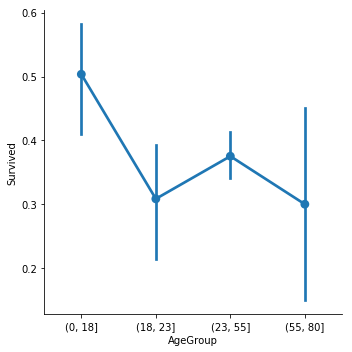

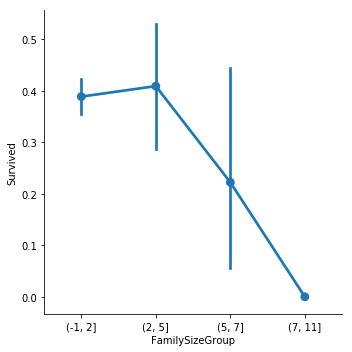

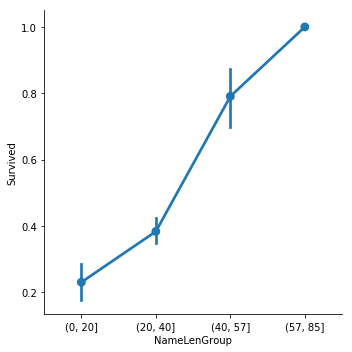

In [3]:
#--------------------
# Under-18 feature
df['U18'] = df['Age'] < 18
df_test['U18'] = df_test['Age'] < 18

bins = [0, 18, 23, 55, 80]
df['AgeGroup'] = pd.cut(df['Age'], bins)
df_test['AgeGroup'] = pd.cut(df_test['Age'], bins)

sns.factorplot(x="AgeGroup", y="Survived", data=df)
print(df["AgeGroup"].unique())

#--------------------
# Family size
df['FamilySize'] = (df['Parch'] + df['SibSp'])
df_test['FamilySize'] = (df_test['Parch'] + df_test['SibSp'])

bins = [-1, 2, 5, 7, 11]
df['FamilySizeGroup'] = pd.cut(df['FamilySize'], bins)
df_test['FamilySizeGroup'] = pd.cut(df_test['FamilySize'], bins)

sns.factorplot(x="FamilySizeGroup", y="Survived", data=df)
print(df["FamilySizeGroup"].unique())

#--------------------
# Name length
df['NameLen'] = [len(n) for n in df['Name']]
df_test['NameLen'] = [len(n) for n in df_test['Name']]

bins = [0, 20, 40, 57, 85]
df['NameLenGroup'] = pd.cut(df['NameLen'], bins)
df_test['NameLenGroup'] = pd.cut(df_test['NameLen'], bins)

sns.factorplot(x="NameLenGroup", y="Survived", data=df)
print(df["NameLenGroup"].unique())
#--------------------


In [4]:
titles = ['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Dr.', 'Col.', 'Capt.', 'Sir.', 'Lady.', 'Countess.', 'Dona.'
          , 'Major.', 'Don.', 'Rev.', 'Father', 'Jonkheer.', 'Mlle.', 'Ms.', 'Mme.']

df['Title'] = df['Name'].apply(lambda n: str(set([w for w in n.split()]) & set(titles)) )
df_test['Title'] = df_test['Name'].apply(lambda n: str(set([w for w in n.split()]) & set(titles)) )

df['Title'].unique()
df_test['Title'].unique()



array(["{'Mr.'}", "{'Mrs.'}", "{'Miss.'}", "{'Master.'}", "{'Ms.'}",
       "{'Col.'}", "{'Rev.'}", "{'Dr.'}", "{'Dona.'}"], dtype=object)

In [5]:
labels = ['Sex', 'Embarked', 'Deck', 'NameLenGroup', 'FamilySizeGroup', 'AgeGroup', 'Title']
les = {}

for l in labels:
    print('labeling ' + l)
    les[l] = LabelEncoder()
    les[l].fit(df[l].append(df_test[l]))
    tr = les[l].transform(df[l]) 
    df.loc[:, l + '_feat'] = pd.Series(tr, index=df.index)

    tr_test = les[l].transform(df_test[l]) 
    df_test.loc[:, l + '_feat'] = pd.Series(tr_test, index=df_test.index)



labeling Sex
labeling Embarked
labeling Deck
labeling NameLenGroup
labeling FamilySizeGroup
labeling AgeGroup


TypeError: unorderable types: Interval() < float()

In [6]:
X_train = df.drop(labels, 1) \
    .drop('Survived', 1) \
    .drop('Cabin', 1) \
    .drop('Ticket', 1) \
    .drop('NameLen', 1) \
    .drop('Name', 1) \
    .drop('PassengerId', 1)
y_train = df['Survived']

X_test = df_test.drop(labels, 1) \
    .drop('Cabin', 1) \
    .drop('Ticket', 1) \
    .drop('NameLen', 1) \
    .drop('Name', 1) \
    .drop('PassengerId', 1)

print("X_train shape", X_train.shape)
print("X_test  shape", X_test.shape)

#X_train.describe()
#X_test.describe()

X_train shape (891, 13)
X_test  shape (418, 13)


/home/daniele/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Survived                1.000000
Sex_feat                0.543351
Pclass                  0.338481
Deck_feat               0.301116
NameLenGroup_feat       0.297221
Fare                    0.257307
Embarked_feat           0.174199
U18                     0.122239
TicketNo                0.095844
Parch                   0.081629
Age                     0.069809
FamilySizeGroup_feat    0.062015
SibSp                   0.035322
FamilySize              0.016639
Name: Survived, dtype: float64

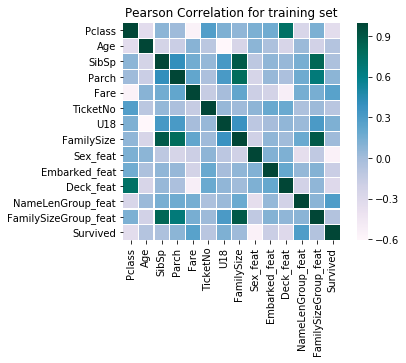

In [7]:

full_set = X_train[:]
full_set['Survived'] = y_train

plt.title('Pearson Correlation for training set')
sns.heatmap(full_set.astype(float).corr(),
            linewidths=0.1,
            vmax=1.0, 
            square=True, 
            cmap="PuBuGn", 
            linecolor='w', 
            annot=False)

full_set.corr()['Survived'].abs().sort_values(ascending = False)

In [ ]:
X_train = X_train.drop('SibSp', 1) \
    .drop('Parch', 1) 

X_test = X_test.drop('SibSp', 1) \
    .drop('Parch', 1) 

In [ ]:
def dummies(train, test, columns ):
    for column in columns:
        train[column] = train[column].apply(lambda x: str(x))
        test[column] = test[column].apply(lambda x: str(x))
        good_cols = [column+'_'+i for i in train[column].unique() if i in test[column].unique()]
        train = pd.concat((train, pd.get_dummies(train[column], prefix = column)[good_cols]), axis = 1)
        test = pd.concat((test, pd.get_dummies(test[column], prefix = column)[good_cols]), axis = 1)
        del train[column]
        del test[column]
    return train, test
X_train, X_test = dummies(X_train, X_test, columns=['Pclass'
                                                    , 'Sex_feat'
                                                    , 'Embarked_feat'
                                                    , 'Deck_feat'
                                                    , 'TicketNo'
                                                    , 'Title_feat'
                                                    , 'AgeGroup_feat'
                                                    , 'FamilySizeGroup_feat'
                                                    , 'NameLenGroup_feat'])

In [ ]:
full_set = X_train[:]
full_set['Survived'] = y_train

full_set.corr()['Survived'].abs().sort_values(ascending = False)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
rf = RandomForestClassifier( criterion='entropy', 
                             n_estimators=400,
                             min_samples_split=16,
                             min_samples_leaf=1,
                             max_features='auto',
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)

rf.fit(X_tr, y_tr)
pred = rf.predict(X_ts)

score = rf.score(X_ts, y_ts)
err = math.sqrt(((pred - y_ts)**2).mean())
print("Error: %.3f Score: %.3f" % (err, score))

In [ ]:
pd.concat((pd.DataFrame(X_train.iloc[:, 1:].columns, columns = ['variable']), 
           pd.DataFrame(rf.feature_importances_, columns = ['importance'])), 
          axis = 1).sort_values(by='importance', ascending = False)[:20]

In [ ]:
# Training the validated model with the whole training set
rf.fit(X_train, y_train)

pred = rf.predict(X_test)

df_test['Survived'] = pd.Series(pred)
sub = df_test[['PassengerId','Survived']]

sub.to_csv('submission_forest.csv', index=False)